In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score, confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<Axes: xlabel='is_canceled', ylabel='count'>

Text(0.5, 1.0, 'Cancellation Distribution')

([<matplotlib.axis.XTick at 0x7f8a6ca1c880>,
 [Text(0, 0, 'Not Canceled'), Text(1, 0, 'Canceled')])

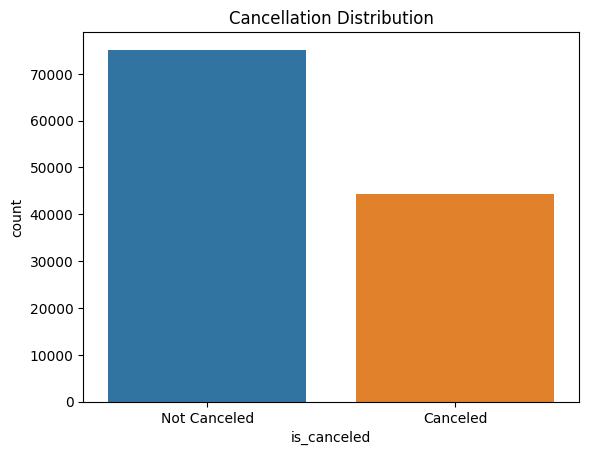

75166

44224

In [ ]:
# load data from csv file
df = pd.read_csv('/content/hotel_bookings.csv', error_bad_lines=False)
df

# Plot target variable distribution
sns.countplot(data=df, x="is_canceled")
plt.title('Cancellation Distribution')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

cancel_counts = df['is_canceled'].value_counts()
not_canceled_count = cancel_counts[0]
not_canceled_count
print("\n")
canceled_count = cancel_counts[1]
canceled_count

The Hotel booking demand data set has 32 variables and about 150,000 recode. Among them, 105509 has is_canceled value equals to 0 and 44268 equal to 1

# Data Cleaning and Preprocessing

In [ ]:
# drop column with too many NULL value, repetition or little significance
df = df.drop(['arrival_date_year', 'arrival_date_week_number', 'agent', 'company', 'reservation_status', 'reservation_status_date'], axis=1)
df = df.dropna()

# encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
df['hotel'] = label_encoder.fit_transform(df['hotel'])
df['meal'] = label_encoder.fit_transform(df['meal'])
df['country'] = label_encoder.fit_transform(df['country'])
df['market_segment'] = label_encoder.fit_transform(df['market_segment'])
df['distribution_channel'] = label_encoder.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = label_encoder.fit_transform(df['deposit_type'])
df['customer_type'] = label_encoder.fit_transform(df['customer_type'])

# encode categorical features using mapping Encoding
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)
df

# divide features and target variables
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']


,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,7,1,0,0,2,0.0,0,...,0,2,2,3,0,0,2,0.00,0,0
1,1,0,737,7,1,0,0,2,0.0,0,...,0,2,2,4,0,0,2,0.00,0,0
2,1,0,7,7,1,0,1,1,0.0,0,...,0,0,2,0,0,0,2,75.00,0,0
3,1,0,13,7,1,0,1,1,0.0,0,...,0,0,0,0,0,0,2,75.00,0,0
4,1,0,14,7,1,0,2,2,0.0,0,...,0,0,0,0,0,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,8,30,2,5,2,0.0,0,...,0,0,0,0,0,0,2,96.14,0,0
119386,0,0,102,8,31,2,5,3,0.0,0,...,0,4,4,0,0,0,2,225.43,0,2
119387,0,0,34,8,31,2,5,2,0.0,0,...,0,3,3,0,0,0,2,157.71,0,4
119388,0,0,109,8,31,2,5,2,0.0,0,...,0,0,0,0,0,0,2,104.40,0,0


In the data cleaning and preprocessing step. Firstly, I dropped column with too many NULL value, repetition or little significance. I dropped 'arrival_date_year' because year is similar among recode and the year is a large number, which can bias the model. I dropped 'arrival_date_week_number' because it can be represented by 'arrival_date_month'	and 'arrival_date_day_of_month'. I drop agent and company because I the recode has too many NULL value and these 2 features are not very important in my analysis. I dropped 'reservation_status' because I can be represented by 'is_canceled', which is the feature I need to predict.

In addition, I used LabelEncoder to transform categorical columns 'hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', and 'customer_type' into numerical representations. The 'arrival_date_month' column is encoded using a mapping dictionary that maps month names to corresponding numerical values. By encoding categorical features, the data are prepared for further analysis and modeling, as many machine learning algorithms require numerical inputs.

# Feature Selection

<Figure size 2000x2000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

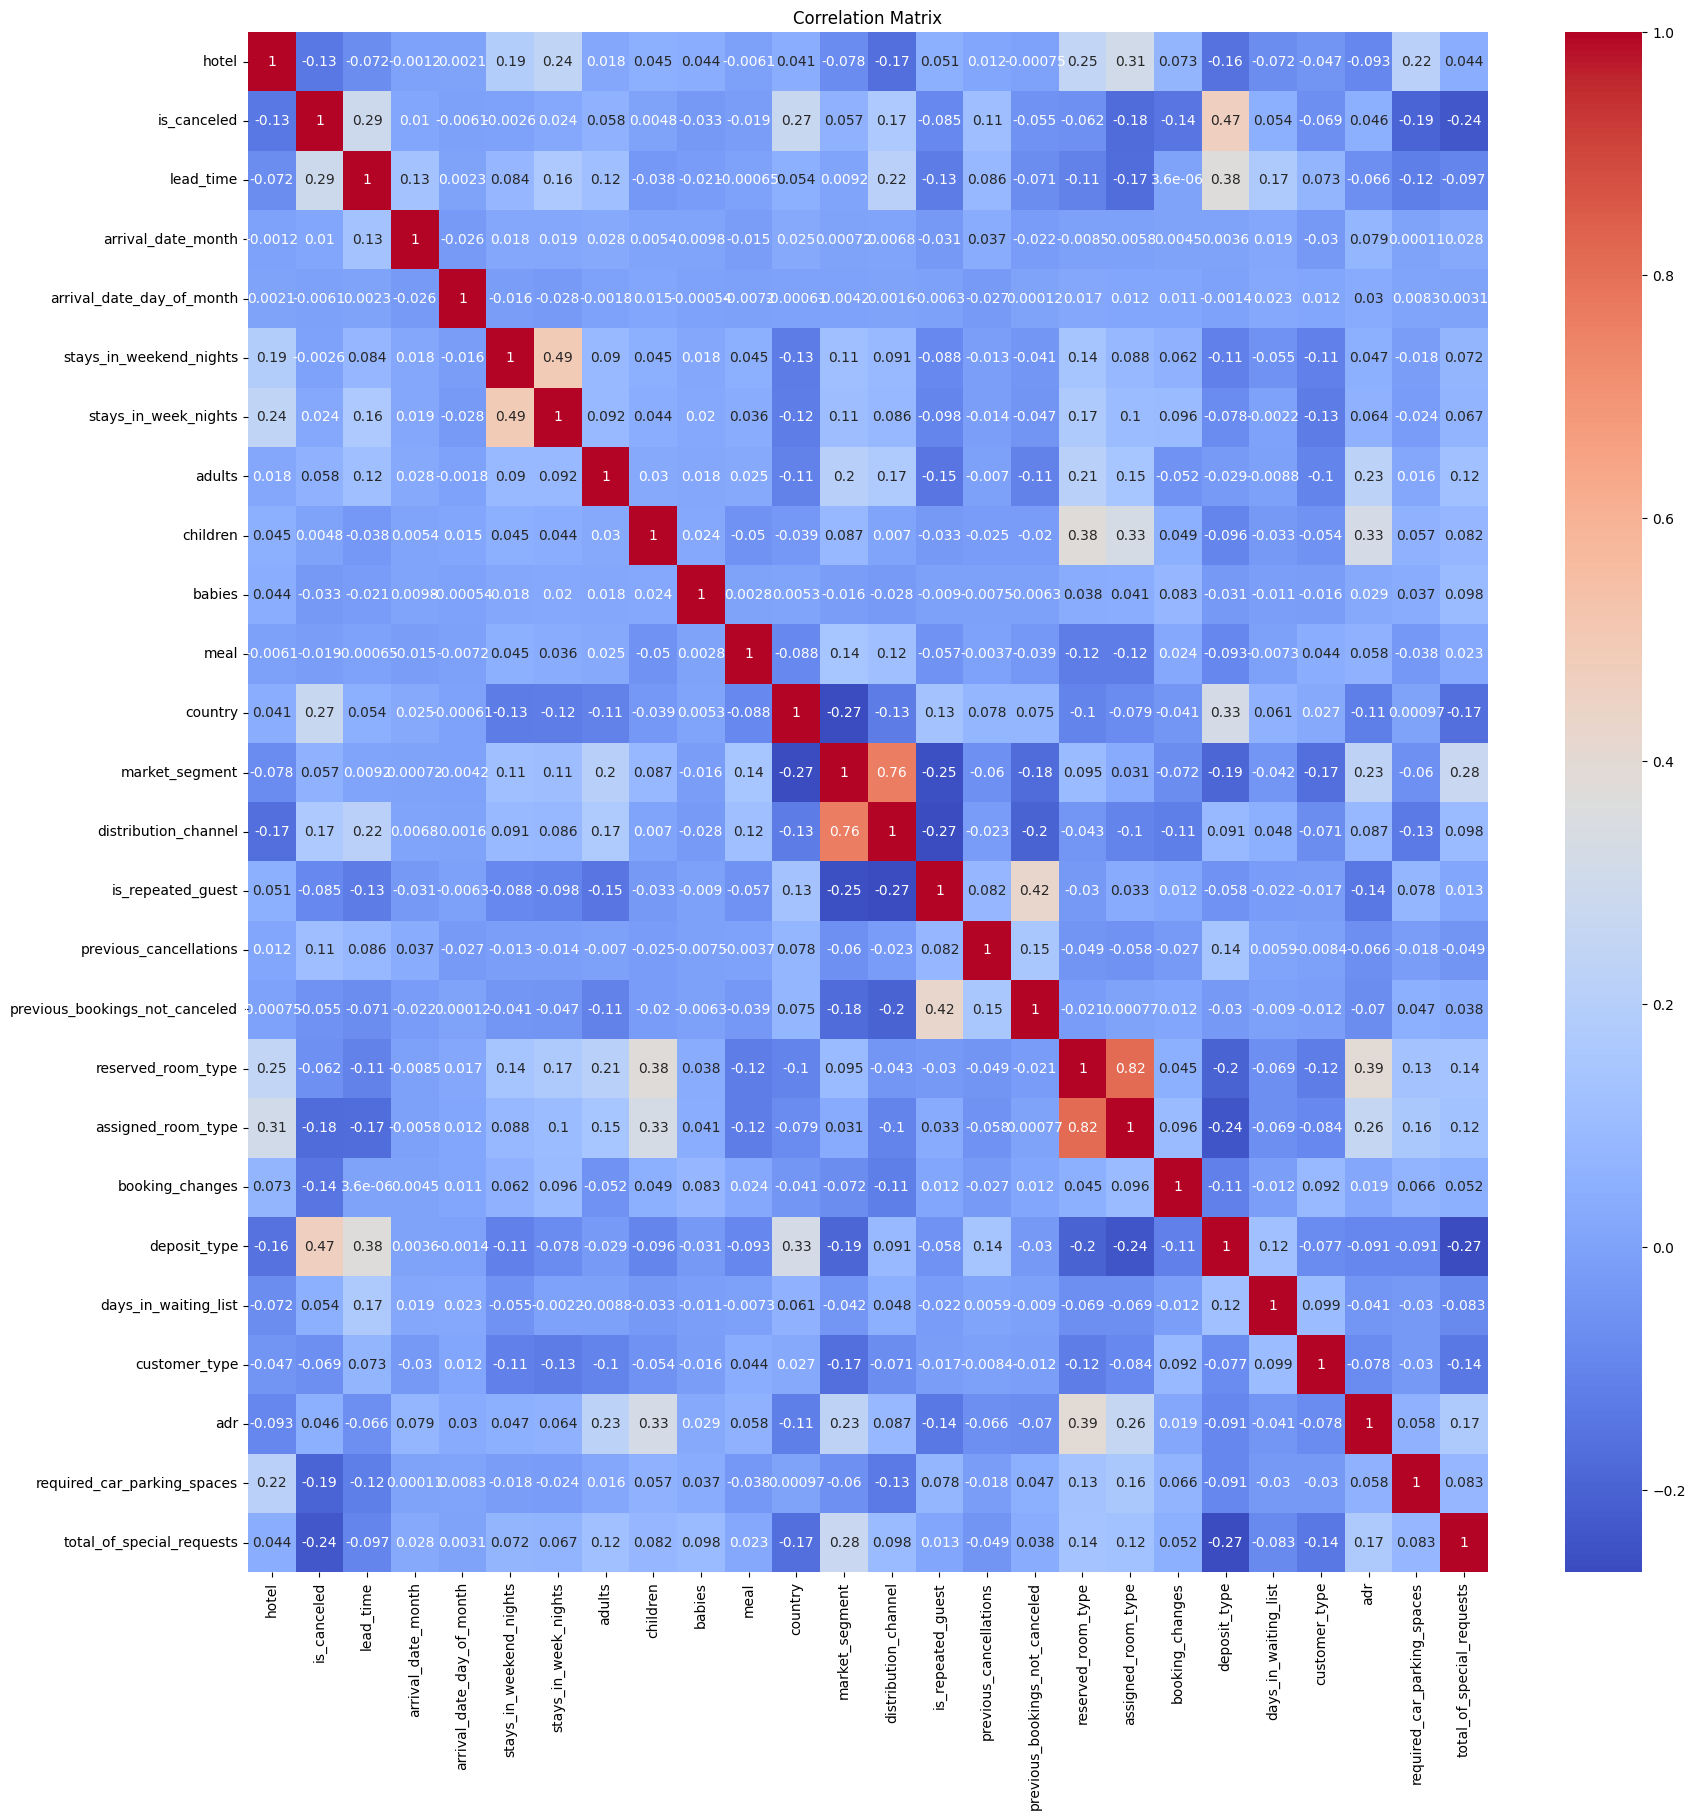

RandomForestClassifier()

<Figure size 2000x1000 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Feature Importance')

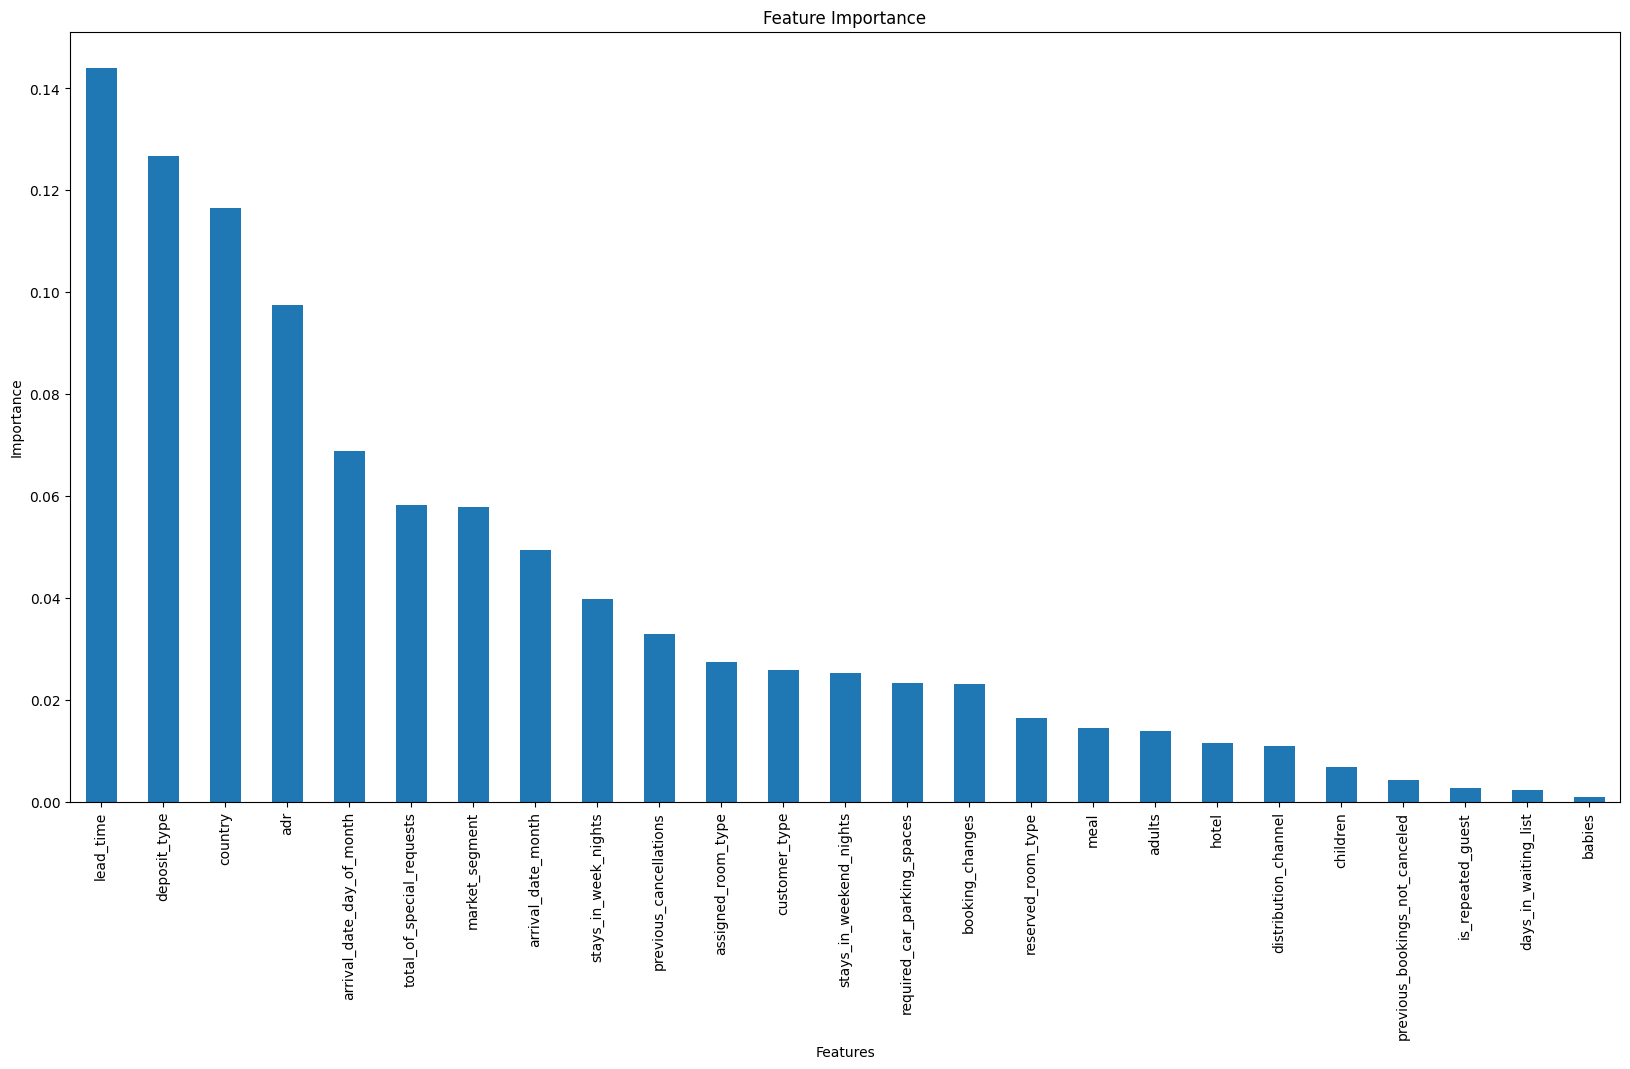

In [ ]:
# correlation analysis
correlation_matrix =df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# feature importance assessment Using Random Forest Classifier
model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)

# visualize feature importance
plt.figure(figsize=(20, 10))
sorted_feature_importance.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Select the 15 most important features based on correlation and feature importance
selected_features = sorted_feature_importance[:15].index.tolist()
X = df[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

For feature selection, I performed correlation analysis and assessed the feature importance using a Random Forest Classifier on the provided dataset.

To begin, I computed the correlation matrix and visualized it using a heatmap. This allowed me to gain insights into the relationships among different variables.

Next, I trained a Random Forest Classifier model to determine the importance of each feature. By sorting and plotting the feature importances in a bar chart, I could easily identify the most influential features in the dataset. I chose Random Forest Classifier to determine feature importance before model training because it provides a quantitative measure of each feature's contribution to the model's predictive performance. It captures non-linear relationships and interactions, helps with feature selection, and improves model interpretability.

Finally, based on the feature importance scores, I selected the top 15 features for further analysis or modeling purposes. These features are expected to have a significant impact on predicting the target variable.

By analyzing correlations and feature importances, I gained a better understanding of the dataset and identified the most important features for predicting the desired outcome.

# Models
## K-Nearest Neighbors (KNN)

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9, 11, 15, 20]}
knn_grid = GridSearchCV(knn, knn_params, cv=5, return_train_score=True)
knn_grid.fit(X_train, y_train)
cv_results = knn_grid.cv_results_


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15, 20]},
             return_train_score=True)

I performed an analysis using the K-Nearest Neighbors (KNN) algorithm. I used GridSearchCV to search for the best k value from a predefined range of options (3, 5, 7, 9, 11, 15, 20) and evaluated the model's performance using cross-validation.

Text(0.5, 0, 'Number of Neighbors (K)')

Text(0, 0.5, 'Mean Score')

Text(0.5, 1.0, 'K-Nearest Neighbors Performance')

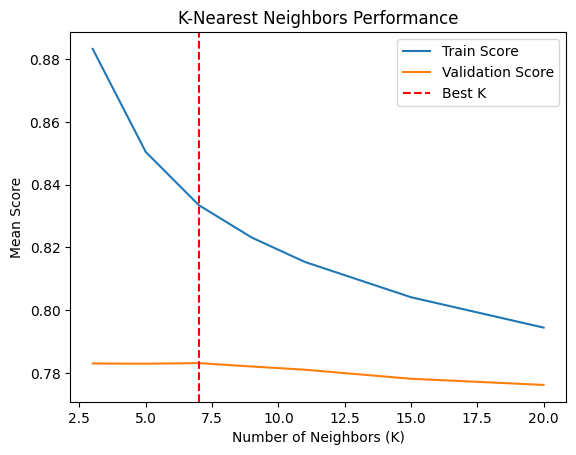

In [ ]:
# Get result
train_scores = cv_results['mean_train_score']
test_scores = cv_results['mean_test_score']
plt.plot(knn_params['n_neighbors'], train_scores, label='Train Score')
plt.plot(knn_params['n_neighbors'], test_scores, label='Validation Score')
best_k = knn_grid.best_params_['n_neighbors']
# plot the result
plt.axvline(x=best_k, color='r', linestyle='--', label='Best K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Score')
plt.title('K-Nearest Neighbors Performance')
plt.legend()
plt.show()

By plotting the mean training and validation scores for each k value. The red dashed line represents the best k value, which was determined as the one with the highest validation score. The best k value for the classification task was 7.

Best K: 7
Best K Accuracy: 0.7854920100925147
Best K Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84     15004
           1       0.74      0.65      0.69      8776

    accuracy                           0.79     23780
   macro avg       0.77      0.76      0.76     23780
weighted avg       0.78      0.79      0.78     23780



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted Labels')

Text(50.722222222222214, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix - Best KNN (K=7)')

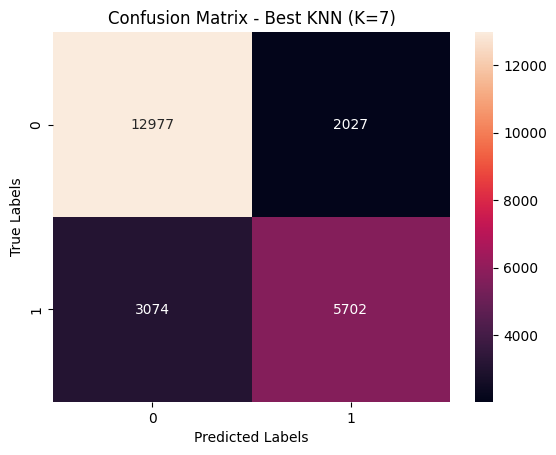

In [ ]:
# Predict with best KNN model
best_knn_model = knn_grid.best_estimator_
best_knn_pred = best_knn_model.predict(X_test)
best_knn_accuracy = accuracy_score(y_test, best_knn_pred)
best_knn_report = classification_report(y_test, best_knn_pred)
print("Best K:", best_k)
print("Best K Accuracy:", best_knn_accuracy)
print("Best K Classification Report:\n", best_knn_report)

# plot confusion_matrix with best knn model
confusion_mat = confusion_matrix(y_test, best_knn_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best KNN (K={})'.format(best_k))
plt.show()

Using this best KNN model with k=7, I made predictions on the test set and calculated the accuracy score and classification report to evaluate its performance. Additionally, I generated a confusion matrix to visualize the predicted labels against the true labels.

The KNN model with k=7 achieved an accuracy of 0.7855 on the test set. The precision and recall for class 0 (not canceled) were 0.81 and 0.86, respectively, indicating that the model correctly identified a large portion of the non-canceled bookings. For class 1 (canceled), the precision and recall were 0.74 and 0.65, respectively, indicating a slightly lower performance in correctly predicting canceled bookings.

The overall weighted average F1-score was 0.78, suggesting a reasonable balance between precision and recall across both classes. The macro-average F1-score was 0.76, indicating a similar performance when considering each class independently.

The confusion matrix visualization further illustrates the model's performance. It shows that the majority of the predictions were concentrated along the diagonal, indicating a substantial number of correct predictions. However, there were some misclassifications, particularly in predicting class 1.

## Logistic Regression

LogisticRegression()

Logistic Regression Accuracy: 0.7690496215306981
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83     15004
           1       0.74      0.57      0.65      8776

    accuracy                           0.77     23780
   macro avg       0.76      0.73      0.74     23780
weighted avg       0.77      0.77      0.76     23780



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted Labels')

Text(50.722222222222214, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

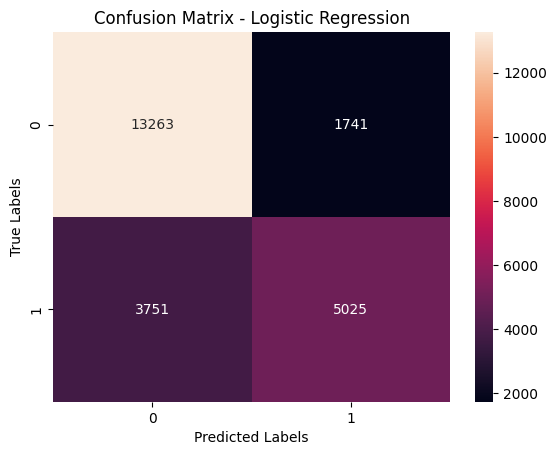

In [ ]:
# train model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logreg_pred = logistic_regression.predict(X_test)

# evaluate performance
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_report = classification_report(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:\n", logreg_report)

# plot confusion matrix
confusion_mat = confusion_matrix(y_test, logreg_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

 Logistic Regression model achieves an accuracy of 0.769. The model achieves higher precision and recall for the "Not Canceled" class (0) compared to the "Canceled" class (1). The precision for class 0 is 0.81, which means that out of all the samples predicted as not canceled, 81% of them are actually not canceled. The recall for class 0 is 0.86, indicating that the model correctly identifies 86% of the not canceled samples. For class 1, the precision is 0.74, meaning that out of all the samples predicted as canceled, 74% of them are truly canceled. The recall for class 1 is 0.65, indicating that the model identifies 65% of the canceled samples correctly. 

## Ridge Regression

RidgeClassifierCV(alphas=[0.1, 1, 10, 100, 1000, 10000], cv=5)

Best Alpha: 1000.0
Best Alpha Ridge Classifier Accuracy: 0.7773759461732548
Best Alpha Classifier Report:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84     15004
           1       0.84      0.49      0.62      8776

    accuracy                           0.78     23780
   macro avg       0.80      0.72      0.73     23780
weighted avg       0.79      0.78      0.76     23780



<Axes: >

Text(0.5, 23.52222222222222, 'Predicted Labels')

Text(50.722222222222214, 0.5, 'True Labels')

Text(0.5, 1.0, 'Confusion Matrix - Ridge Classifier')

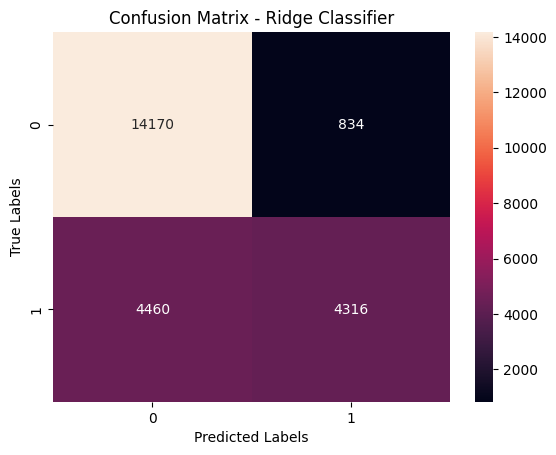

In [ ]:
# train model
ridge_regression = RidgeClassifierCV(alphas=[0.1, 1, 10, 100, 1000, 10000], cv=5)
ridge_regression.fit(X_train, y_train)
ridge_pred = ridge_regression.predict(X_test)

# evaluate performance
best_alpha = ridge_regression.alpha_
ridge_accuracy = accuracy_score(y_test, ridge_pred)
ridge_report = classification_report(y_test, ridge_pred)
print("Best Alpha:", best_alpha)
print("Best Alpha Ridge Classifier Accuracy:", ridge_accuracy)
print("Best Alpha Classifier Report:\n", ridge_report)

# plot confusion matrix
confusion_mat = confusion_matrix(y_test, ridge_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Ridge Classifier')
plt.show()

 Ridge Classifier model with the best alpha value of 1000.0 achieved an accuracy of 0.777, indicating that the model correctly predicted approximately 77.7% of the instances in the test set. The model showed higher precision and recall for class 0 compared to class 1. 

 The precision for class 0 (the negative class) was 0.76, which means that 76% of the instances predicted as class 0 were actually class 0. The recall for class 0 was 0.94, indicating that the model correctly identified 94% of the actual class 0 instances. The f1-score, which is a harmonic mean of precision and recall, was 0.84 for class 0.For class 1 (the positive class), the precision was 0.84, indicating that 84% of the instances predicted as class 1 were actually class 1. The recall for class 1 was 0.49, meaning that the model identified only 49% of the actual class 1 instances. The f1-score for class 1 was 0.62. Overall, the model's performance was decent, with a higher accuracy for class 0 (the majority class) compared to class 1. However, the recall for class 1 was relatively low, suggesting that the model had difficulty identifying instances of class 1 correctly.
 

## Neural Network

In [ ]:
neural_network = MLPClassifier()
mlp_structures = [
  (10,),    # Single hidden layer with 10 nodes
  (20,),    # Single hidden layer with 20 nodes
  (5, 10),  # Two hidden layers with 5 nodes and 10 nodes
  (10, 20),  # Two hidden layers with 10 nodes and 20 nodes
  (10, 10, 10),  # Three hidden layers with 10 nodes each
]
nn_params = {'hidden_layer_sizes': mlp_structures, 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
nn_grid = GridSearchCV(neural_network, nn_params, cv=5, return_train_score=True)
nn_grid.fit(X_train, y_train)
cv_results = nn_grid.cv_results_
cv_results

In [ ]:
# Get the best parameters
best_hidden_layer_sizes = nn_grid.best_params_['hidden_layer_sizes']
best_alpha = nn_grid.best_params_['alpha']
best_nn_model = nn_grid.best_estimator_
best_nn_pred = best_nn_model.predict(X_test)
best_nn_accuracy = accuracy_score(y_test, best_nn_pred)
best_nn_report = classification_report(y_test, best_nn_pred)
print("Best Hidden Layer Sizes:", best_hidden_layer_sizes)
print("Best Alpha:", best_alpha)
print("Best Neural Network Accuracy:", best_nn_accuracy)
print("Best Neural Network Classification Report:\n", best_nn_report)

# plot confusion matrix
confusion_mat = confusion_matrix(y_test, best_nn_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best Neural Network (Hidden Layer Sizes={})'.format(best_hidden_layer_sizes))
plt.show()


Run the neural network needs more computing resources, so I ran it on my computer instead of the Colab.

The best neural network model with hidden layer sizes of (10, 20) and an alpha value of 0.001 achieved an accuracy of 0.8084 on the test set. This means that the model correctly predicted the class labels for approximately 80.84% of the instances.

For  precision values, the model achieved a precision of 82% for class 0 and 78% for class 1. 
In terms of recall, the model achieved a recall of 89% for class 0 and 67% for class 1. The F1-score for class 0 was 85% and for class 1 was 72%. 

Overall, the model's performance is satisfactory with a good accuracy score and reasonable precision, recall, and F1-scores for both classes. It shows a relatively balanced ability to correctly classify instances from both classes, although there is some imbalance between class 0 and class 1 in terms of recall.


## Support Vector Machine (SVM)

In [ ]:
# Train the model with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)

# Get the accuracy and classification report
svm_linear_accuracy = accuracy_score(y_test, svm_linear_pred)
svm_linear_report = classification_report(y_test, svm_linear_pred)

# Print the results
print("Linear SVM Accuracy:", svm_linear_accuracy)
print("Linear SVM Classification Report:\n", svm_linear_report)

# Plot the confusion matrix
confusion_mat = confusion_matrix(y_test, svm_linear_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Linear SVM')
plt.show()


Run the neural network needs more computing resources, so I ran it on my computer instead of the Colab.

The accuracy achieved by the Linear SVM model is 0.788, or approximately 78.9%. This means that the model correctly predicts the target variable for 78.9% of the instances in the test set.

The classifier report provides a breakdown of precision, recall, and F1-score for both classes (0 and 1) in your target variable. For class 0, the precision is 0.79, recall is 0.90, and F1-score is 0.84. For class 1, the precision is 0.77, recall is 0.60, and F1-score is 0.68. These metrics help evaluate the model's performance for each class individually.

The macro-average F1-score, which calculates the average F1-score across all classes, is 0.76. The weighted average F1-score, which accounts for class imbalance, is 0.78. These metrics provide an overall assessment of the model's performance across all classes.

# Result

Comparing models above, the Neural Network model achieved the highest accuracy of 0.808, with a macro-average F1-score of 0.79. It showed good precision, recall, and F1-score for both classes, indicating a balanced performance in predicting both positive and negative instances. The Linear SVM model also performed well with an accuracy of 0.788 and a macro-average F1-score of 0.76.

Based on these results, the Neural Network model seems to be the best performing model for this particular dataset. It demonstrates higher accuracy and better overall performance compared to other models. 
